













































# Lab 2: Logistic regression - Titanic

https://www.kaggle.com/c/titanic/data

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
import sklearn as sk

In [3]:
# This cell has to be run ONLY if you are using google colab on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!tar -xvf drive/MyDrive/Colab\ Notebooks/data/data.tar

data/testtitanic.csv
data/traintitanic.csv
data/gender_submission.csv
data/


In [5]:
df = pd.read_csv("/content/data/traintitanic.csv")


In [6]:
# Using head(), info(), describe() etc. inspect the dataset. Which features are numerical, which ones are categorical? Comment about missing data.

df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Answers***

*Numerical*: `PassengerID`, `Age`, `Faire`, `SibSp` (number of siblings/spouses), `Parch `(number of parents/childs).

*Categorical*: `PClass`, `Sex`, `Cabin`, `Embarked` (port: C = Cherbourg, Q = Queenstown, 
S = Southampton)

*Missing data:* 177 passengers' ages are unknown. We only know the cabin of 204 passengers. We don't know of 2 passengers' embarking port.


In [9]:
# Using the df.groupby("Pclass"), comment about the nature of the passengers as a function of the class ticket (first, second or third class) 
df.groupby("Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


We notice the following trends: 

1. We can see that the passengers are older as the class gets higher (which is reasonable, as older people had more wealth to afford higher class tickets).

2. The fare obviously increases depending on the class.

3. People from higher classes had a better chance of survival overall. This can be attributed to them having priority during the evacuation. 

4. On average, people from the third class traveled with one family member (Sibling, spouse, parent, or children). The average number of companions decreases as the class increases.



<AxesSubplot:>

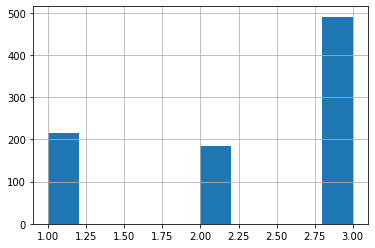

In [10]:
# Plot the histogram of Passenger's classes
df['Pclass'].hist()

In [11]:
# Comment about the impact of the sex of passengers
df[["Survived", "Sex"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


We can see female passengers were much more likely to survive. This can bee attributed to the Birkenhead drill that occured during the evacuation. The Birkenhead drill is a code of conduct whereby the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited. 

In [12]:
# Comment about the impact of the embarkation city. How do you explain the discrepancies in survival rate?
df[["Embarked", "Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


As we will see in the histograms 3 cells below, a greater percentage of first class passengers embarked in port C (roughly 50%). Additionally, a sizable portion of those embarked in C were females. 

In port Q, there were also high class passengers, but mostly men. That explain its low survival rate.

In port S, there were mostly lower class men.

We have seen before (and will see below) that class and sex were the most correlated factors to the survival of the passengers.

<AxesSubplot:>

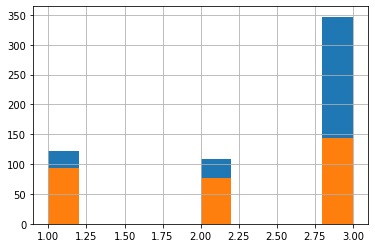

In [13]:
#Plot the histogram of the number of men in each class. Do the same for men. Comment.
df[df['Sex'] == "male"].Pclass.hist()
df[df['Sex'] == "female"].Pclass.hist()

The higher the class, the lower the female:male lower. This is reasonable. Back in the 1912, male dominated most of the wealth and were able to afford the more expensive tickets. As mentioned previously, people in the first class had on average less companions with them. So men traveled without their spouses. That might explain the lower ratios.


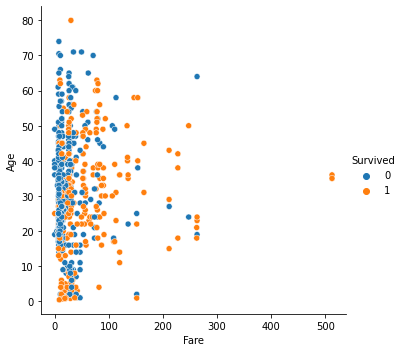

In [14]:
# Comment briefly the following code
sns.relplot(data=df,x="Fare", y="Age",hue="Survived")

No pattern is immediately obvious. We can see that the survivors density increases with the ticket fare. The fare is almost equivalent to the passenger class, so the correlation makes sense.

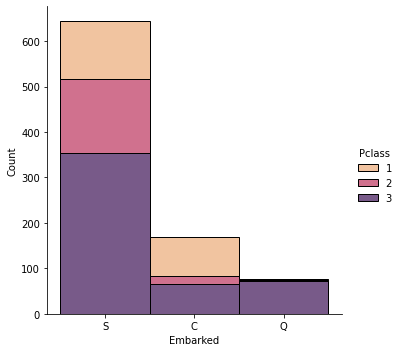

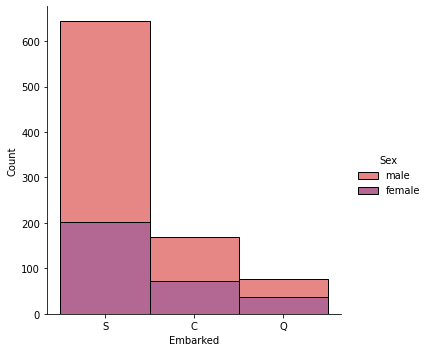

In [15]:
# In case you believe that other plots are interesting to vizualize the data set, you can provide them here.

#information about the demographical and class distribution in embarcation ports
sns.displot(df, x="Embarked", hue="Pclass", palette = "flare", multiple="stack")
sns.displot(df, x="Embarked", hue="Sex", palette = "flare", multiple="stack")

In [16]:

#Removing the comment in the following line plots every numerical feature against
#every other numerical feature. Each datapoint is colored based on the survival 
#of the passenger. 

#Generating the plot takes about 20 seconds.
#sns.pairplot(df, hue="Survived")

# Categorical encoding

Certain columns (sex, embarked, etc.) are categorical. We need to transform them into numerical features.

In [17]:
# Create a new column "Sex_num" where the strings "male" and "female" are replaced by a binary integer.
df["Sex_num"] = (df["Sex"]=="male").astype("int") #That's ok because there is no missing data in the "Sex" column

In [18]:
# What is the following code doing?
ports = pd.get_dummies(df['Embarked'])

The code above splits the categorical feature "Embarked" (which can take 3 values: 'C', 'Q', 'S') into 3 boolean features. Each boolean is associated with one value. 

'C' will be equal to 100

'Q' will be equal to 010

'S' will be equal to 001


In [19]:
# Using pd.get_dummies, create new columns in the dataframe df, one for each embarkation port
ports = pd.get_dummies(df['Embarked'])
print(ports)
df[ports.columns] = ports

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]


In [20]:
# We may drop the two columns "Sex" and "Embarked", as we now included their onehot counterparts in the dataframe. Check that the following code drops theses columns
df.drop(columns=["Sex","Embarked"], inplace = True)


In [21]:
# Use df.head(). Did the dropped column disappear? Solve possible issued using the argument inplace=True, in the drop method
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_num,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


<AxesSubplot:>

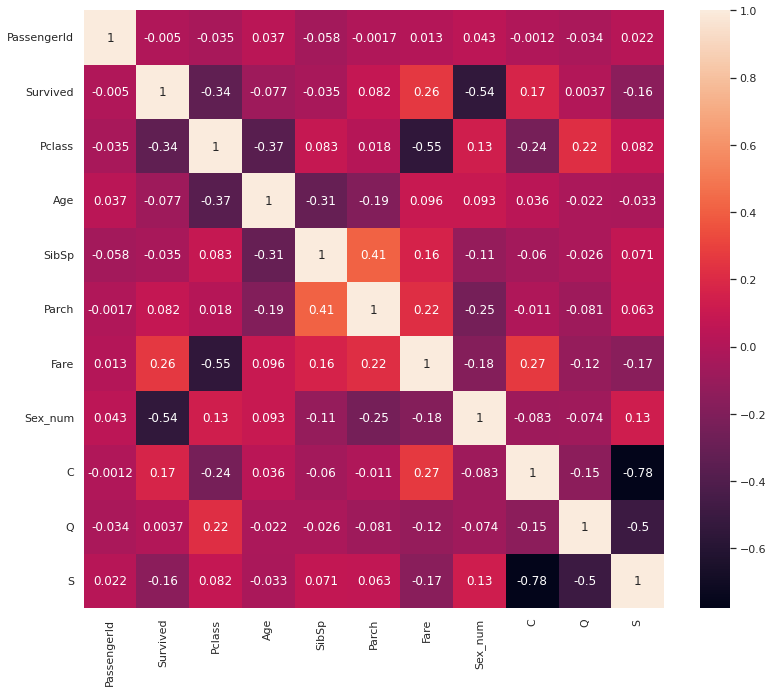

In [22]:
# What does the matrix df.corr() represent? Provide your interpretation of the numbers you see.
sns.set(rc = {'figure.figsize':(13,11)})
sns.heatmap(df.corr(),annot=True)

This is the dataset's correlation matrix. For every pair of features, the correlation coefficient is calculated. We are mostly interested in the column that contains the Survival feature AND another variable. 

We notice the main diagonal is just ones because corr(X, X) = 1. The matrix is also symmetrical because corr(X, Y) = corr(Y, X).

We observe two important correlations: 

1. Survival and sex are strongly negatively correlated. The reasons behind this are explained above.

2. Survival and class are also strongly negatively correlated. The higher the class (the lower the number), the greater the survival rate. 

Some other interesting correlations occur:

1. If you traveled with a spouse or sibling, it was also likely you traveled with children or parents. 

2. Fare and Pclass is correlated to which port you departed from. This relationship is discussed above.

3. As mentioned above, age and class are considerably correlated. This fact will be useful when inferring the missing ages of passenger. 

# Data cleansing
Check the number of missing values in "Age". You can either


*   Do nothing (the rows with missing "Age" will be ignored in the training stage)
*   Or fill the missing values with some value of your choice.


Do something smart.



In [23]:
# Do something smart to handle the problem of missing values in the "Age" column

# Pclass and age are strongly correlated (see correlation matrix). 
# Therefore, the passenger class gives you information about the possible age of the passenger
# So, for every passenger with missing age, we will infer their age to be the median
# age of their class.
df['FilledAge'] = df.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

a, b, c = df.groupby(['Pclass'])['Age'].apply(lambda x: x.median())
median_ages = [a, b, c]

In [24]:
# We will train a logistic regression. Write below the columns which you would like to keep as features for logistic regression.
# n.b.: We will NOT keep the columns Ticket and Cabin. Why?

mycolumns = ["FilledAge", "SibSp", "Parch", "Fare", "Sex_num", "C", "Q", "S"]


Ticket and Cabin are categorical features that are not easily encoded as numerical values. Hence, they are of no use for a logistic classifier. However, we will try to use Cabin information later on to improve our predictions 


Note from the future: Including cabin information did not improve the accuracy of our model. In fact, it decreased the accuracy.

#Logistic regression


In [25]:
# Train a logistic regression classifier using sklearn, based on the above dataframe and the chosen columns. 
# Explain the meaning of the parameter in the logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=1.0,max_iter=1000)

Penalty 'l2': l2 penalty is the squared norm regularitzation term. It penalizes the model when it becomes too complex (a sign of overfitting). We do not want our weights to be too large because the model becomes unstable. l2 adds the squared norm of our weights to the model's loss function so that the complexity is minimized during our training phase.

C: Inverse of regularization strength. Simply put, it is a parameter that controls how much we penalize a complex model. Mathematically, our regularization term is exactly $\frac{1}{c}||w||^2$.


Max_iter: Maximum number of iterations taken for the solvers to converge. Prevents infinite loops.

In [26]:
# Fit the model

lr.fit(df[mycolumns], df["Survived"])

LogisticRegression(max_iter=1000)

In [27]:
# Display the coefficients of the logistic regression. Discuss the possible positive/negative impact on survival of certain parameters

lr.coef_

array([[-0.01785577, -0.38149811, -0.20727981,  0.01484503, -2.54515206,
         0.28540275, -0.3532617 , -0.19612992]])

Unsurprisingly, sex is the predominat weight in this model (-2.5415). We saw earlier that the female surviving rate was much higher than that of men.

We also observe our model captured the positive correlation between the ticket fare and the survival. This again reveals that higherclass passengers were more likely to survive.

We note the negative impact of having family aboard (either `SibSp` or `Parch`). It is difficult to specify the reasons behind this. 




# Performance evaluation


In [28]:
# Load the test data
Xtest = pd.read_csv("/content/data/testtitanic.csv")
ytest = pd.read_csv("/content/data/gender_submission.csv")
dftest = pd.merge(Xtest,ytest)

dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


There are multiple ages missing, and a single datapoint lacks the fare price.

In [29]:
# Process the test features in order to obtain the same format as for the train set

#change categorical sex to boolean sex
dftest["Sex_num"] = (dftest["Sex"]=="male").astype("int") #That's ok because there is no missing data in the "Sex" column

#change embarked category to three boolean categories
ports = pd.get_dummies(dftest['Embarked'])
dftest[ports.columns] = ports
dftest.drop(columns=["Sex","Embarked"], inplace = True)

#fill age with the average of the class (from our training data)
dftest['FilledAge'] = dftest.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(median_ages[x.name-1]))

#to not drop the missing datapoint, we will just infere the fare as the median of its class
dftest['Fare'] = dftest.groupby(['Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))

In [30]:
 # Define a dataframe with only the columns you want to keep (and the label)
dftest_copy = dftest #we create a copy of the dataframe to use in the bonus question
dftest=dftest[mycolumns+["Survived"]]


In [31]:
# Check if there are some missing values. If needed, row containing missing values can be dropped using the dropna() method (inplace)
dftest.info()

#we have fixed our data not to drop a single datapoint

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FilledAge  418 non-null    float64
 1   SibSp      418 non-null    int64  
 2   Parch      418 non-null    int64  
 3   Fare       418 non-null    float64
 4   Sex_num    418 non-null    int64  
 5   C          418 non-null    uint8  
 6   Q          418 non-null    uint8  
 7   S          418 non-null    uint8  
 8   Survived   418 non-null    int64  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 24.1 KB


In [32]:
# Compute the hard predictions on the test set (using only the columns to keep)
ypredict = lr.predict(dftest.iloc[:, :-1])

In [33]:
# Compute the accuracy score
from sklearn.metrics import accuracy_score
# ... your code here ...

accuracy_score(ypredict, dftest.Survived)

0.9665071770334929

In [34]:
# Compute the soft predictions unsing predict_proba
soft_predict = lr.predict_proba(dftest[mycolumns])[:,1]

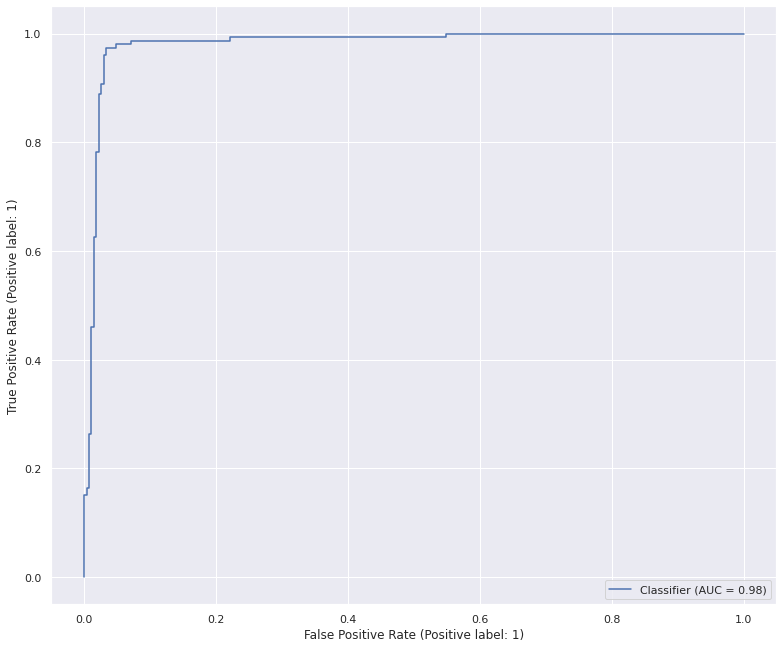

In [35]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(dftest.Survived, soft_predict) 

# Bonus question: do whatever you find useful

Here are some examples:

*   Try to include useful elements of the Cabin number
*   Try different regularization parameters
* Try L1 regularization instead of ridge
* Try linear regression





In [36]:
#The main problem with the Cabin feature is that only about 25% of the data
# contains a meaningful value. It is a reasonable assumption that the cabin influenced
#the survival of the passengers, so we will try to incorporate it to our model

df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

The cabin is composed of two aspects: A letter and a number. Most passengers' cabin is unknown. For others, a range is provided. We will take into consideration the section (the letter of the ticket) for our predicitons,
but not the numbers.

In [37]:
#extract the first character of cabin and put it in a new column called section
df["Section"] = df['Cabin'].str[0] 
df["Section"]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Section, Length: 891, dtype: object

#Exploring the correlation of the Cabin Section and Survival

In [38]:
#The are 7 letters for different cabin sections. We will first try to combine 
#all the classes into a single value that goes from 0 to 6

indexes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df["SectionNum"] = df["Section"].apply(lambda x: indexes.index(x) if x in indexes else float('nan'))

df["SectionNum"]

0      NaN
1      2.0
2      NaN
3      2.0
4      NaN
      ... 
886    NaN
887    1.0
888    NaN
889    2.0
890    NaN
Name: SectionNum, Length: 891, dtype: float64

In [39]:
df[["SectionNum", "Survived"]].corr()

,SectionNum,Survived
SectionNum,1.000000,0.041841
Survived,0.041841,1.000000


The values seem not to be very correlated but this could be due to our arbitrary indexing

In [40]:
#Now we convert them to dummies and evaluate their correlation

sects_dummies = pd.get_dummies(df['Section'])
sects_dummies["Survived"] = df["Survived"]

<AxesSubplot:>

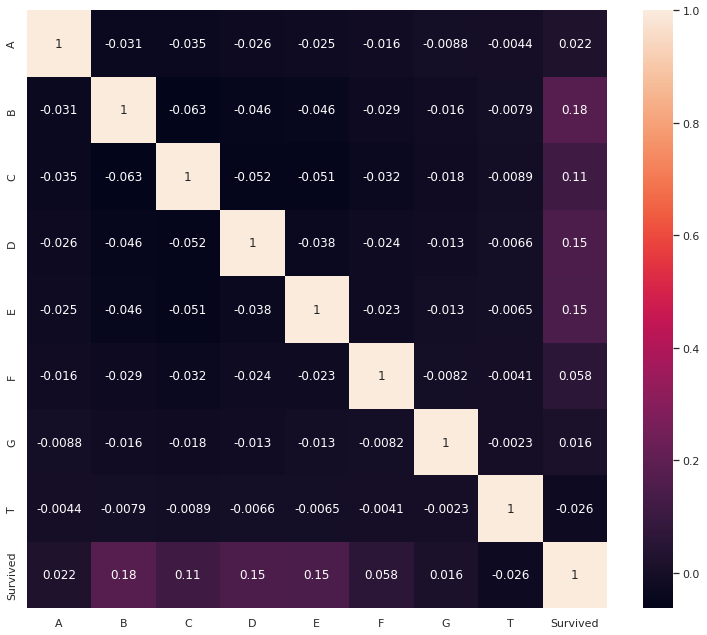

In [41]:
sns.heatmap(sects_dummies.corr(), annot=True)

We see that certain cabins are more strongly correlated to survival than others. So we will continue our idea of incorporating the cabin into our logistic classifier. 

Here's the gameplan:

1. We will split the dataset into training data and data to predict. Our training data will be all the data for which we know the cabin section. Our data to predict will be all the missing values.

2. We will employ a multinomial classifier that predicts the cabin section for all the missing datapoints. We will evaluate the accuracy of this model with the test data with known cabin.

3. We will translate this generated data to one hot encoding. 

4. We will train once again our original logistic model with the added columns.

#Preparing the data and predicting the missing cabins

In [42]:
#first we will split our data into training data and data to predict

# create a boolean mask that identifies NaN values
nan_mask = df['SectionNum'].isna()

# use the mask to split the DataFrame into training data and to predict data
df_known= df[~df['SectionNum'].isna()]
df_topredict = df[df['SectionNum'].isna()]

In [43]:
#now we generate our logistic regression to predict the cabin of the missing datapoints

mycolumns = ["FilledAge", "SibSp", "Parch", "Fare", "Sex_num", "C", "Q", "S"]

lr_cabin = LogisticRegression(penalty='l2',C=1.0,max_iter=10000, multi_class='multinomial')
lr_cabin.fit(df_known[mycolumns], df_known['SectionNum']) 

#the accuracy of this cabin prediction model will be evaluated later

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [44]:
#we predict the missing cabins
predict_cabins = lr_cabin.predict(df_topredict[mycolumns])

In [45]:
#fill in the missing values in the original dataframe with the generated values
df.loc[df.SectionNum.isnull(), 'SectionNum'] = predict_cabins

In [46]:
#We check if the predictions have been filled
print(list(df["Section"])[:10])
print(list(df["SectionNum"])[:10])

[nan, 'C', nan, 'C', nan, nan, 'E', nan, nan, nan]
[5.0, 2.0, 5.0, 2.0, 4.0, 5.0, 4.0, 5.0, 6.0, 5.0]


In [47]:
#we convert the categories into dummy booleans

sects_dummies = pd.get_dummies(df['SectionNum'])
df[sects_dummies.columns] = sects_dummies
df.rename(columns = {0.0:'A', 1.0:'B', 2.0:'C', 3.0:'D', 4.0:'E', 5.0:'F', 6.0:'G'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_num      891 non-null    int64  
 11  C            891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
 14  FilledAge    891 non-null    float64
 15  Section      204 non-null    object 
 16  SectionNum   891 non-null    float64
 17  A            891 non-null    uint8  
 18  B            891 non-null    uint8  
 19  C       

In [48]:
#apply our logistic regression to the new data set with added cabin section columns

final_lr = LogisticRegression(penalty='l2',C=1.0,max_iter=1000)
new_columns = mycolumns + ['A', 'B', 'C', 'D', 'E', 'F', 'G']
final_lr.fit(df[new_columns], df["Survived"])

LogisticRegression(max_iter=1000)

#Preparing the test data set

In [49]:
#extract the cabin section
dftest_copy["Section"] = dftest_copy['Cabin'].str[0] 

#map it to numbers
dftest_copy["SectionNum"] = dftest_copy["Section"].apply(lambda x: indexes.index(x) if x in indexes else float('nan'))

# create a boolean mask that identifies NaN values
nan_mask = dftest_copy['SectionNum'].isna()

# use the mask to split the DataFrame into two separate DataFrames
df_known_test = dftest_copy[~dftest_copy['SectionNum'].isna()]

In [50]:
# Now that we have our test data with known cabin section, we can compute the accuracy
#of our cabin section predicting model

mycolumns = ["FilledAge", "SibSp", "Parch", "Fare", "Sex_num", "C", "Q", "S"]
cabin_pred = lr_cabin.predict(df_known_test[mycolumns])
print(f"accuracy of cabin model = {accuracy_score(cabin_pred, df_known_test.SectionNum)}")


accuracy of cabin model = 0.4065934065934066


Definitely not very good. We will proceed anyways.

In [51]:
#DataFrame with datapoints with missing cabin section
df_nan = dftest_copy[dftest_copy['SectionNum'].isna()]

#we employ our model to predict the missing cabin sections
predict_cabins = lr_cabin.predict(df_nan[mycolumns])

#fill the missing values with the predicted ones
dftest_copy.loc[dftest_copy.SectionNum.isnull(), 'SectionNum'] = predict_cabins

#Split the section wit one hot encoding
sects_dummies = pd.get_dummies(dftest_copy['SectionNum'])
dftest_copy[sects_dummies.columns] = sects_dummies

dftest_copy.rename(columns = {0.0:'A', 1.0:'B', 2.0:'C', 3.0:'D', 4.0:'E', 5.0:'F', 6.0:'G'}, inplace = True)
dftest_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Survived     418 non-null    int64  
 10  Sex_num      418 non-null    int64  
 11  C            418 non-null    uint8  
 12  Q            418 non-null    uint8  
 13  S            418 non-null    uint8  
 14  FilledAge    418 non-null    float64
 15  Section      91 non-null     object 
 16  SectionNum   418 non-null    float64
 17  A            418 non-null    uint8  
 18  B            418 non-null    uint8  
 19  C       

In [52]:
#We run our final prediction
y_pred_with_cabin = final_lr.predict(dftest_copy[new_columns])

In [53]:
#compute the accuracy
accuracy_score(y_pred_with_cabin, dftest_copy.Survived)

0.930622009569378

We can see our accuacy decreased by 3%. This can be attributed to overfitting of the data (meaning the cabin section was not very related to the survivorship of the passenger). 

Another observation is that by filling in so much missing information with a faulty cabin prediction model (40% accuracy), we introduced a lot of noise in our dataset. Hence, the survival prediciton model got more 'confused' than desired.

